# **K Means Clustering**

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
data = pd.read_csv("data/bank-full.csv")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


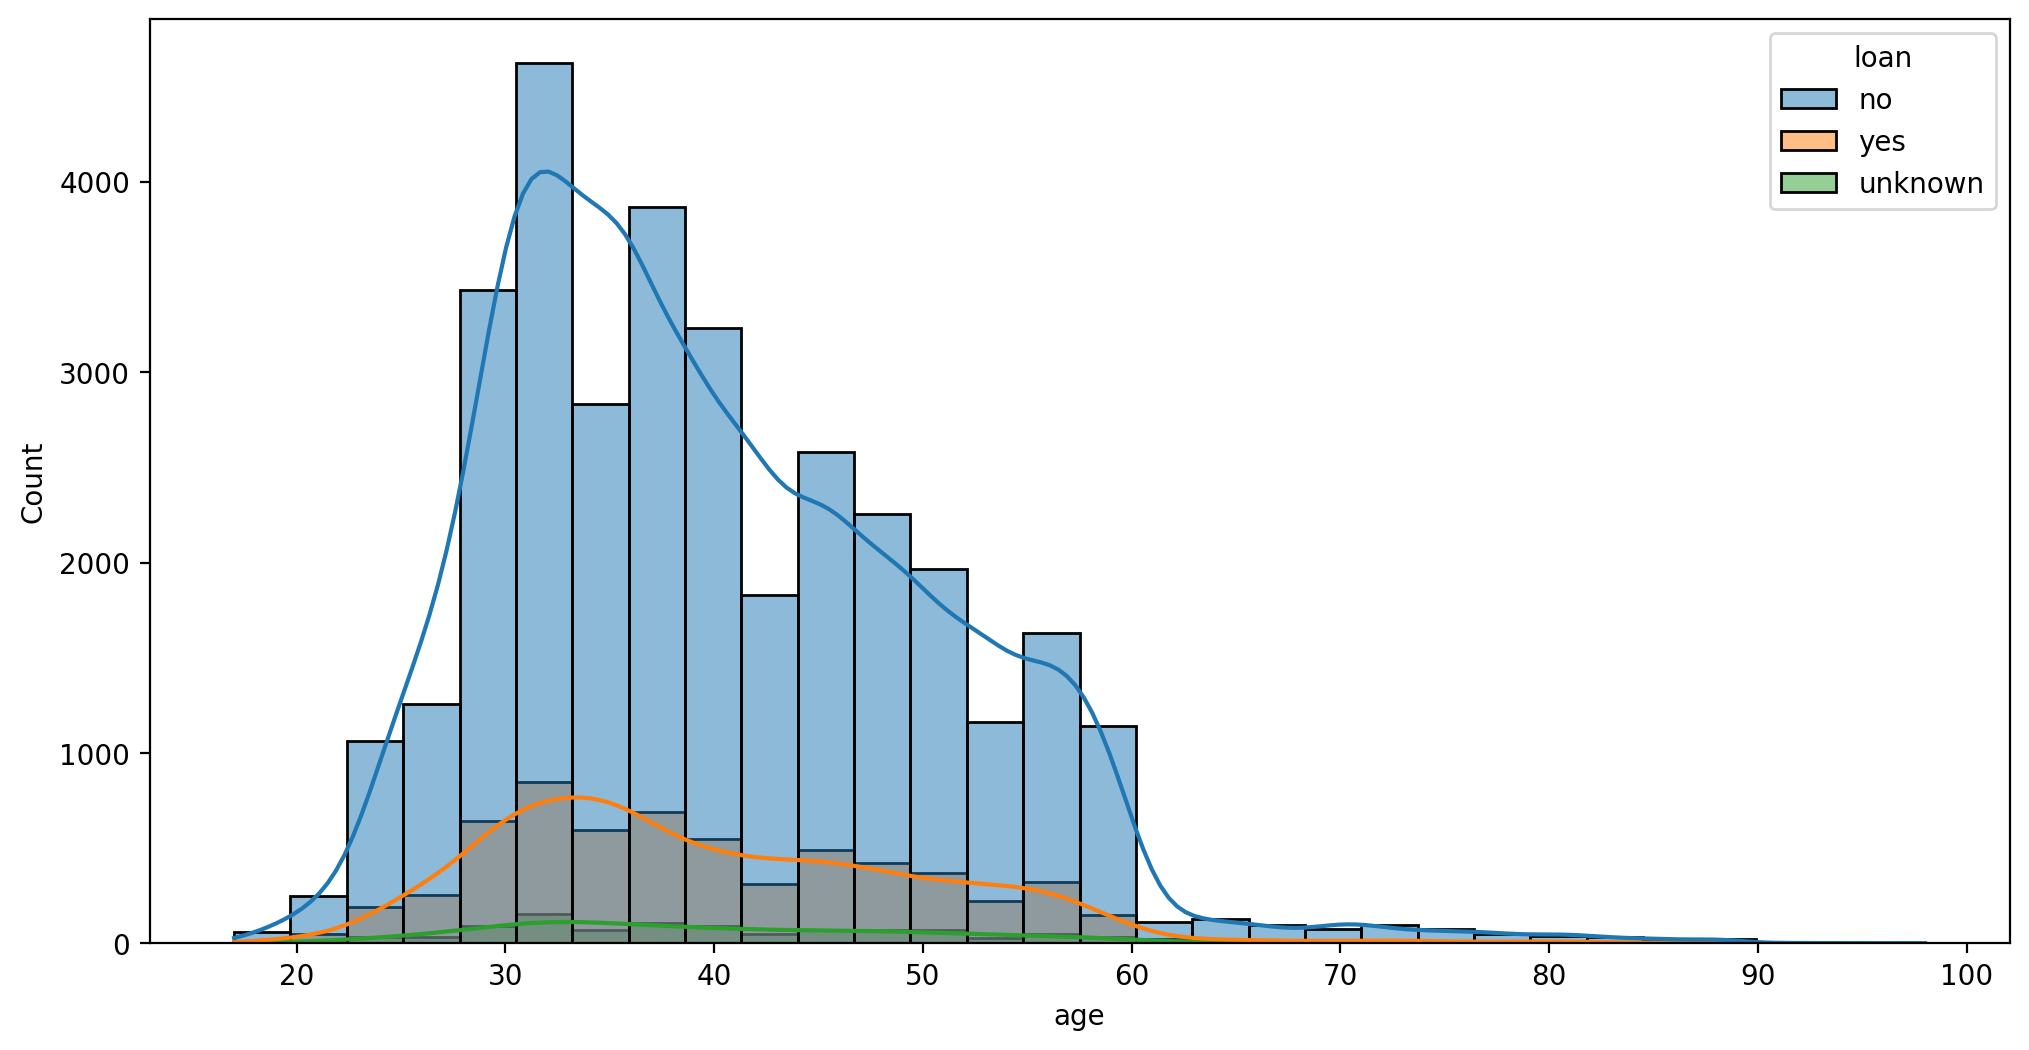

In [17]:
plt.figure(dpi=200, figsize=(12, 6))
sns.histplot(data=data, x='age', bins=30, kde=True, hue='loan')
plt.show()

p_days = number of days since contacted with marketing campaign

999 = never 

39673 customers have never been contacted with a marketing campaign


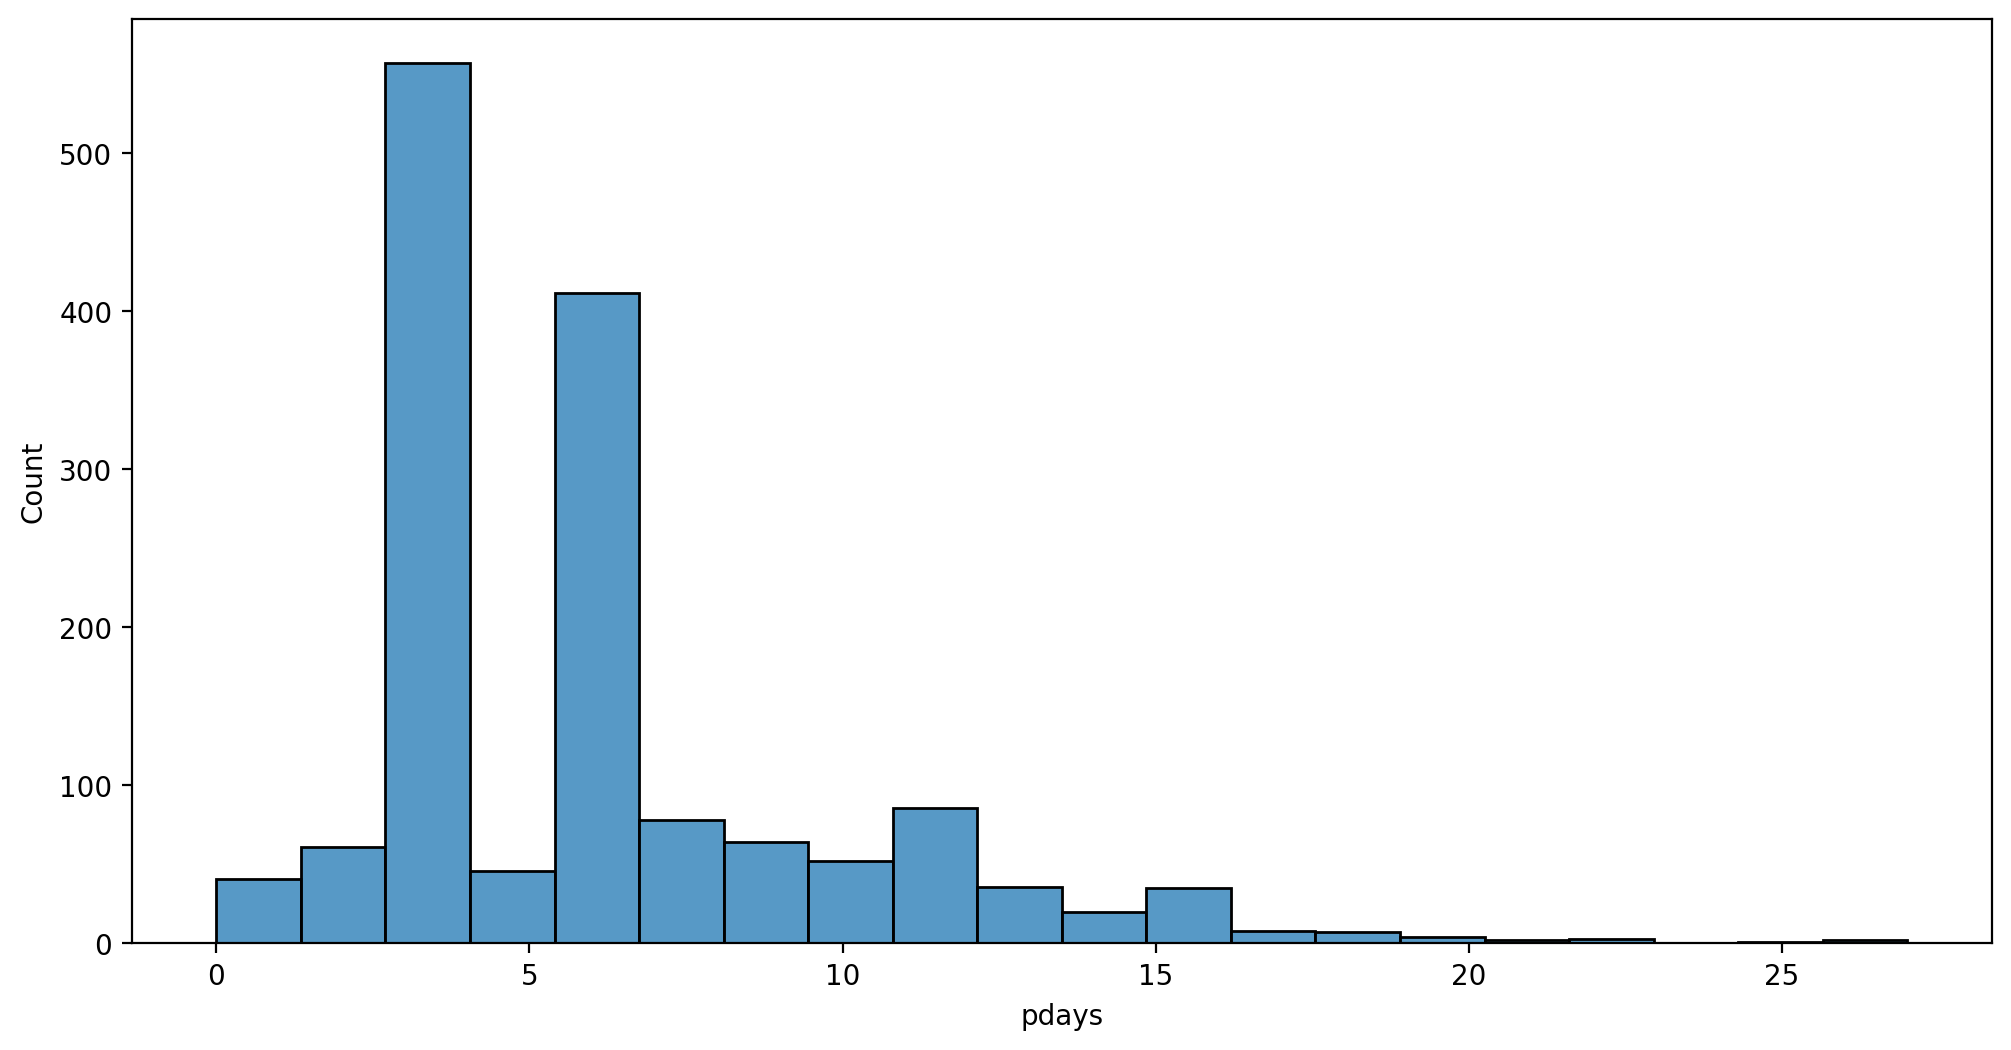

In [23]:
plt.figure(dpi=200, figsize=(12, 6))
sns.histplot(data=data[data['pdays']!=999], x='pdays', bins=20)

n = len(data[data['pdays']==999])
print(f'{n} customers have never been contacted with a marketing campaign')
plt.show()

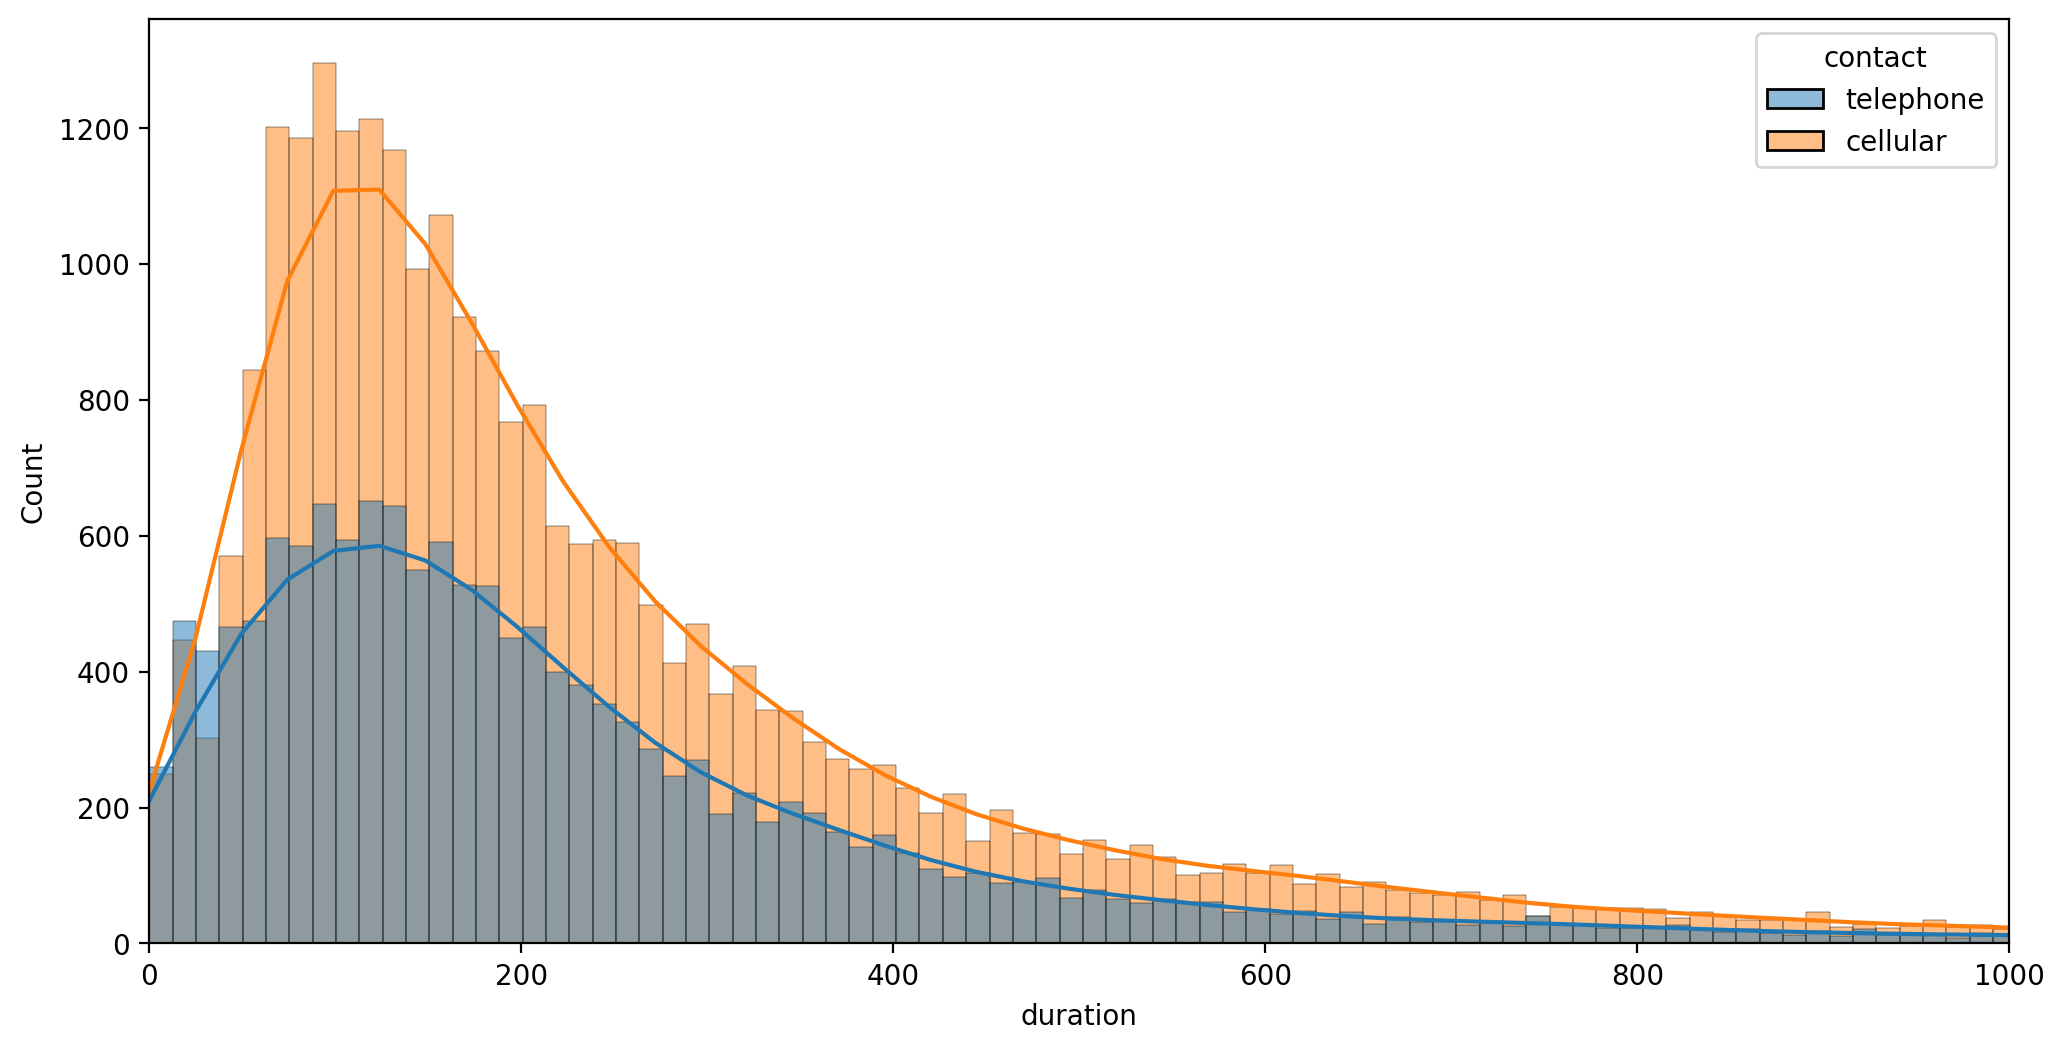

In [30]:
plt.figure(dpi=200, figsize=(12, 6))
sns.histplot(data=data, x='duration', kde=True, hue='contact')
plt.xlim(0, 1000)
plt.show()

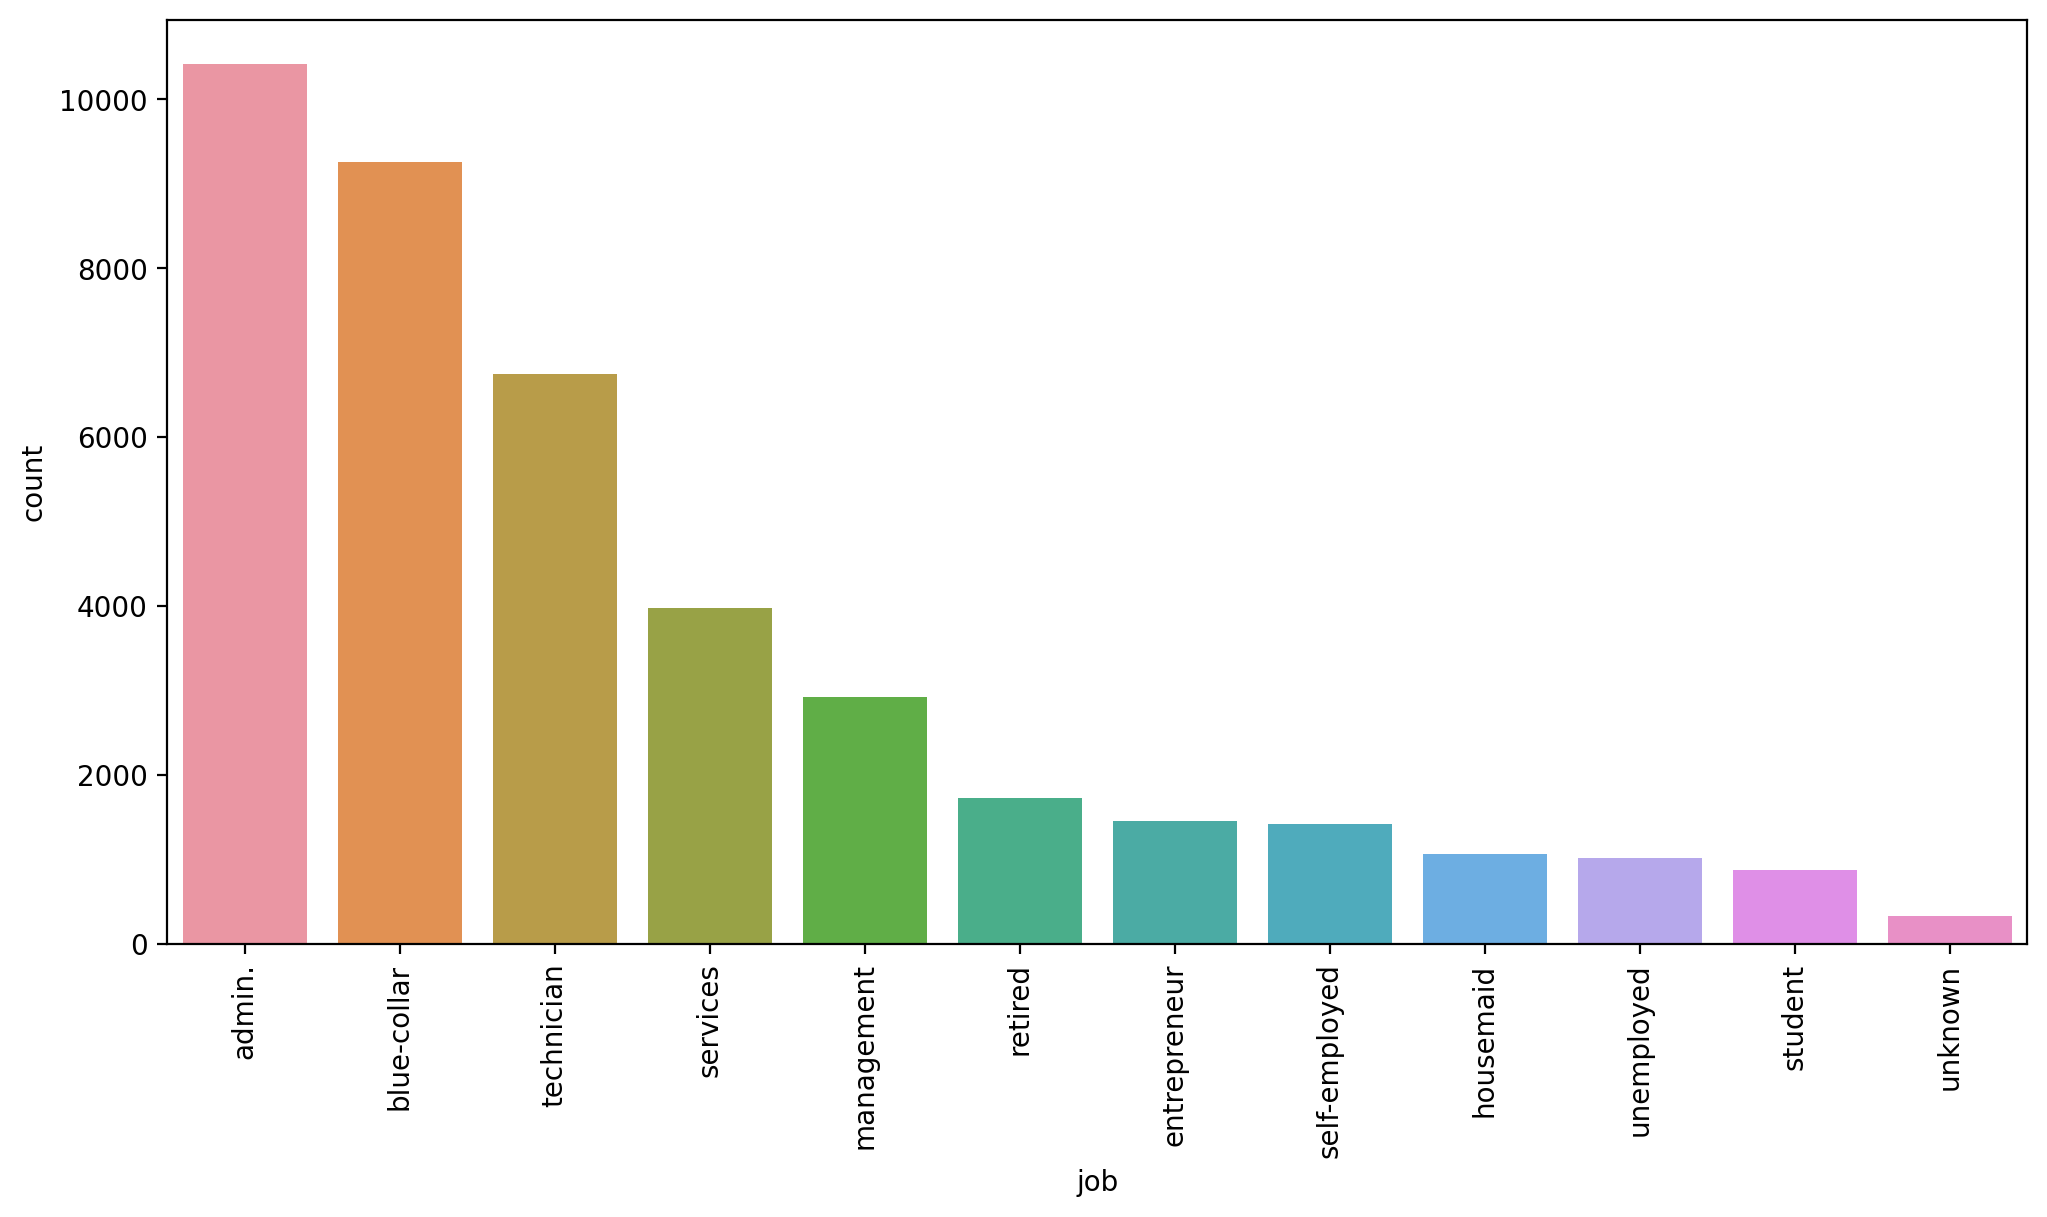

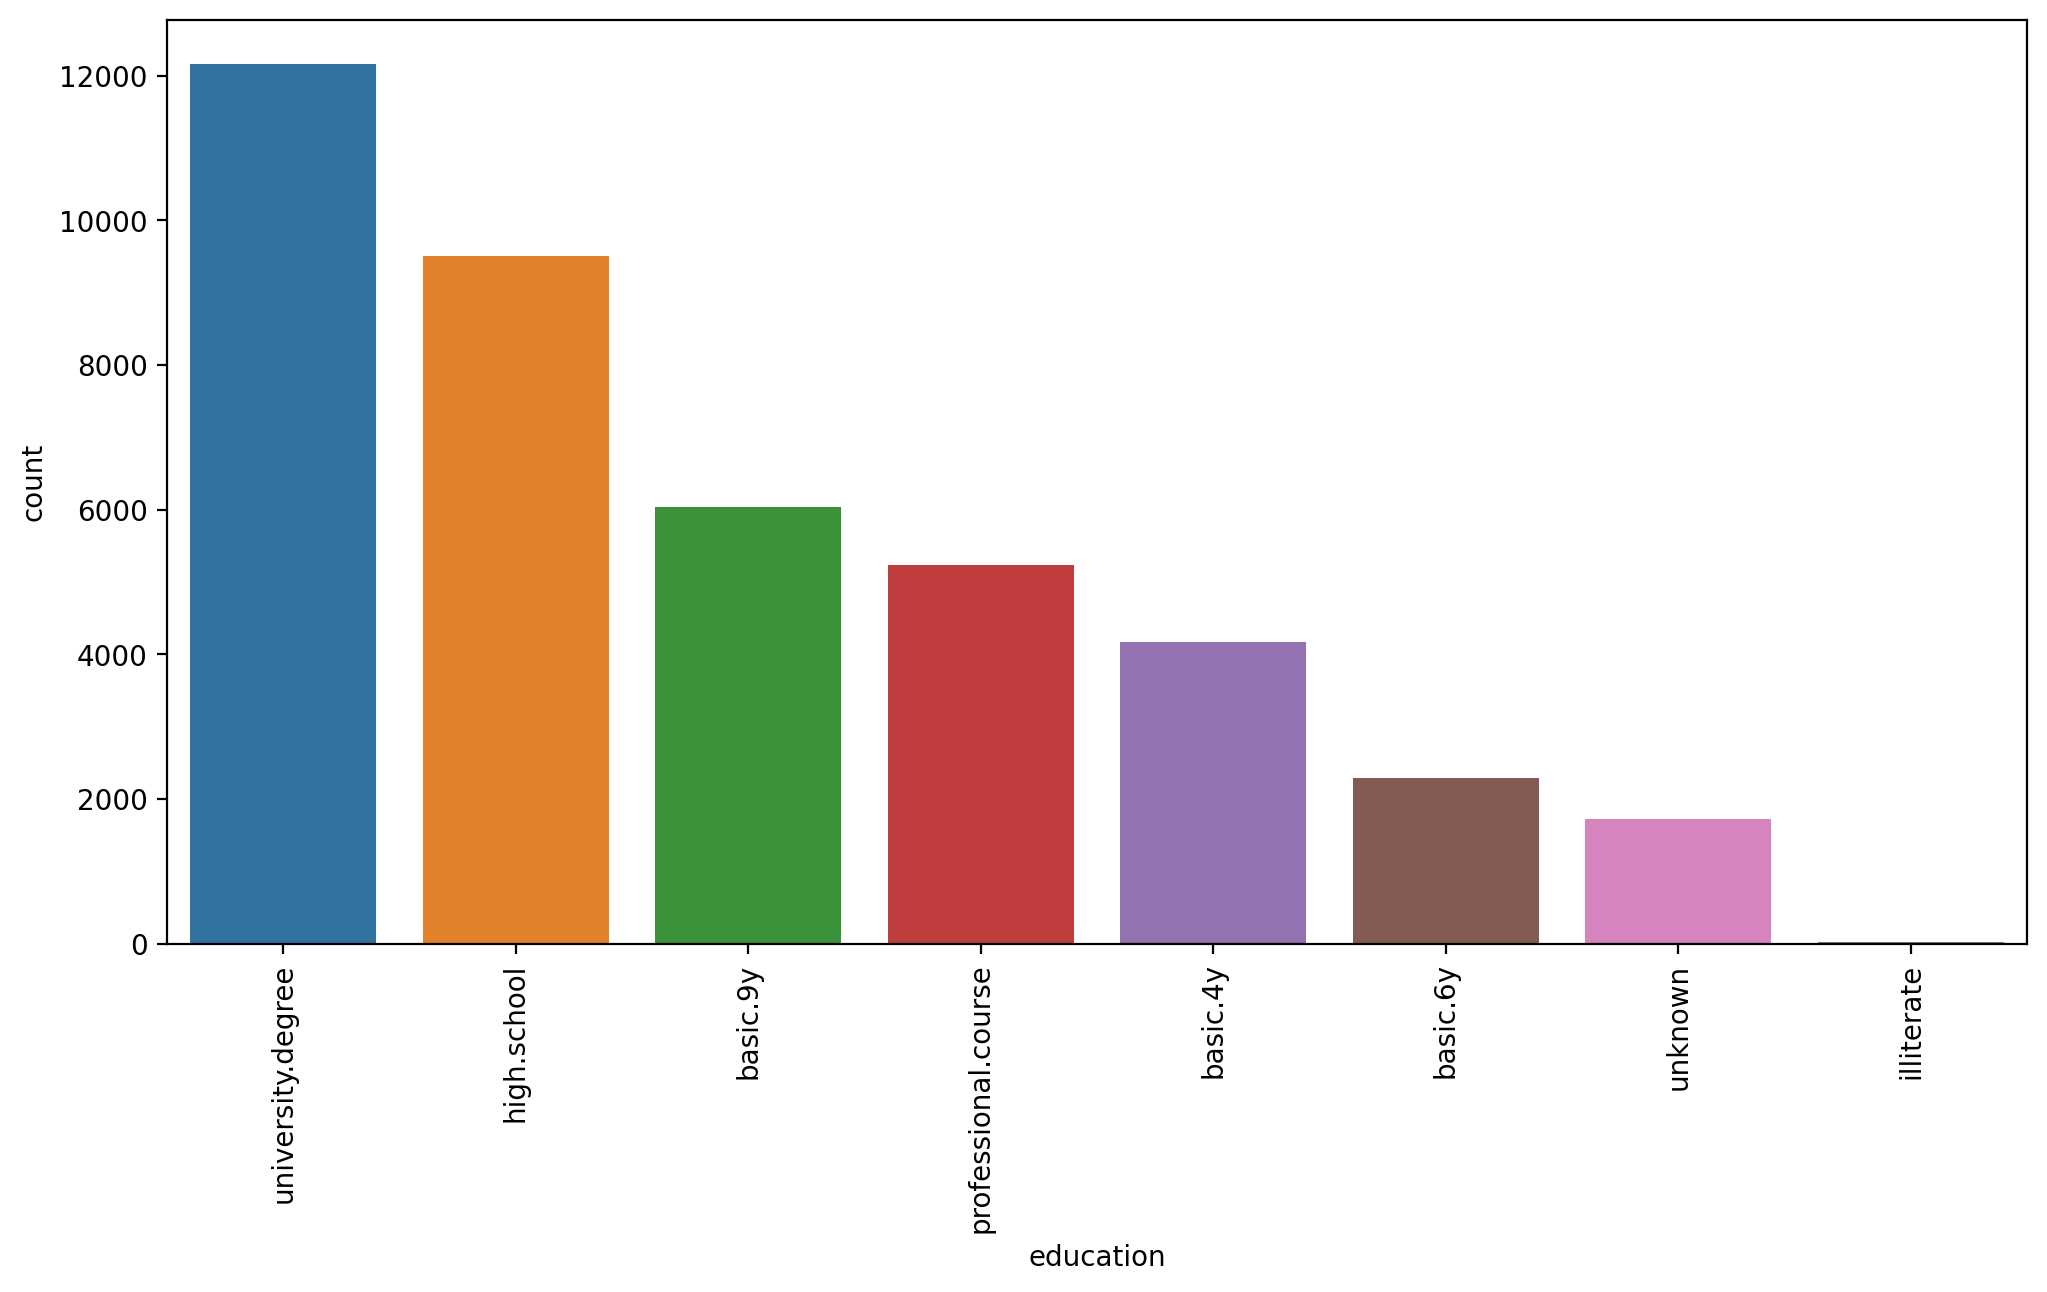

In [38]:
plt.figure(dpi=200, figsize=(12, 6))
sns.countplot(data=data, x='job', order=data['job'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

plt.figure(dpi=200, figsize=(12, 6))
sns.countplot(data=data, x='education', order=data['education'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [43]:
df = data[data['loan']!='no']
df['default'].value_counts()

default
no         5739
unknown    1499
Name: count, dtype: int64

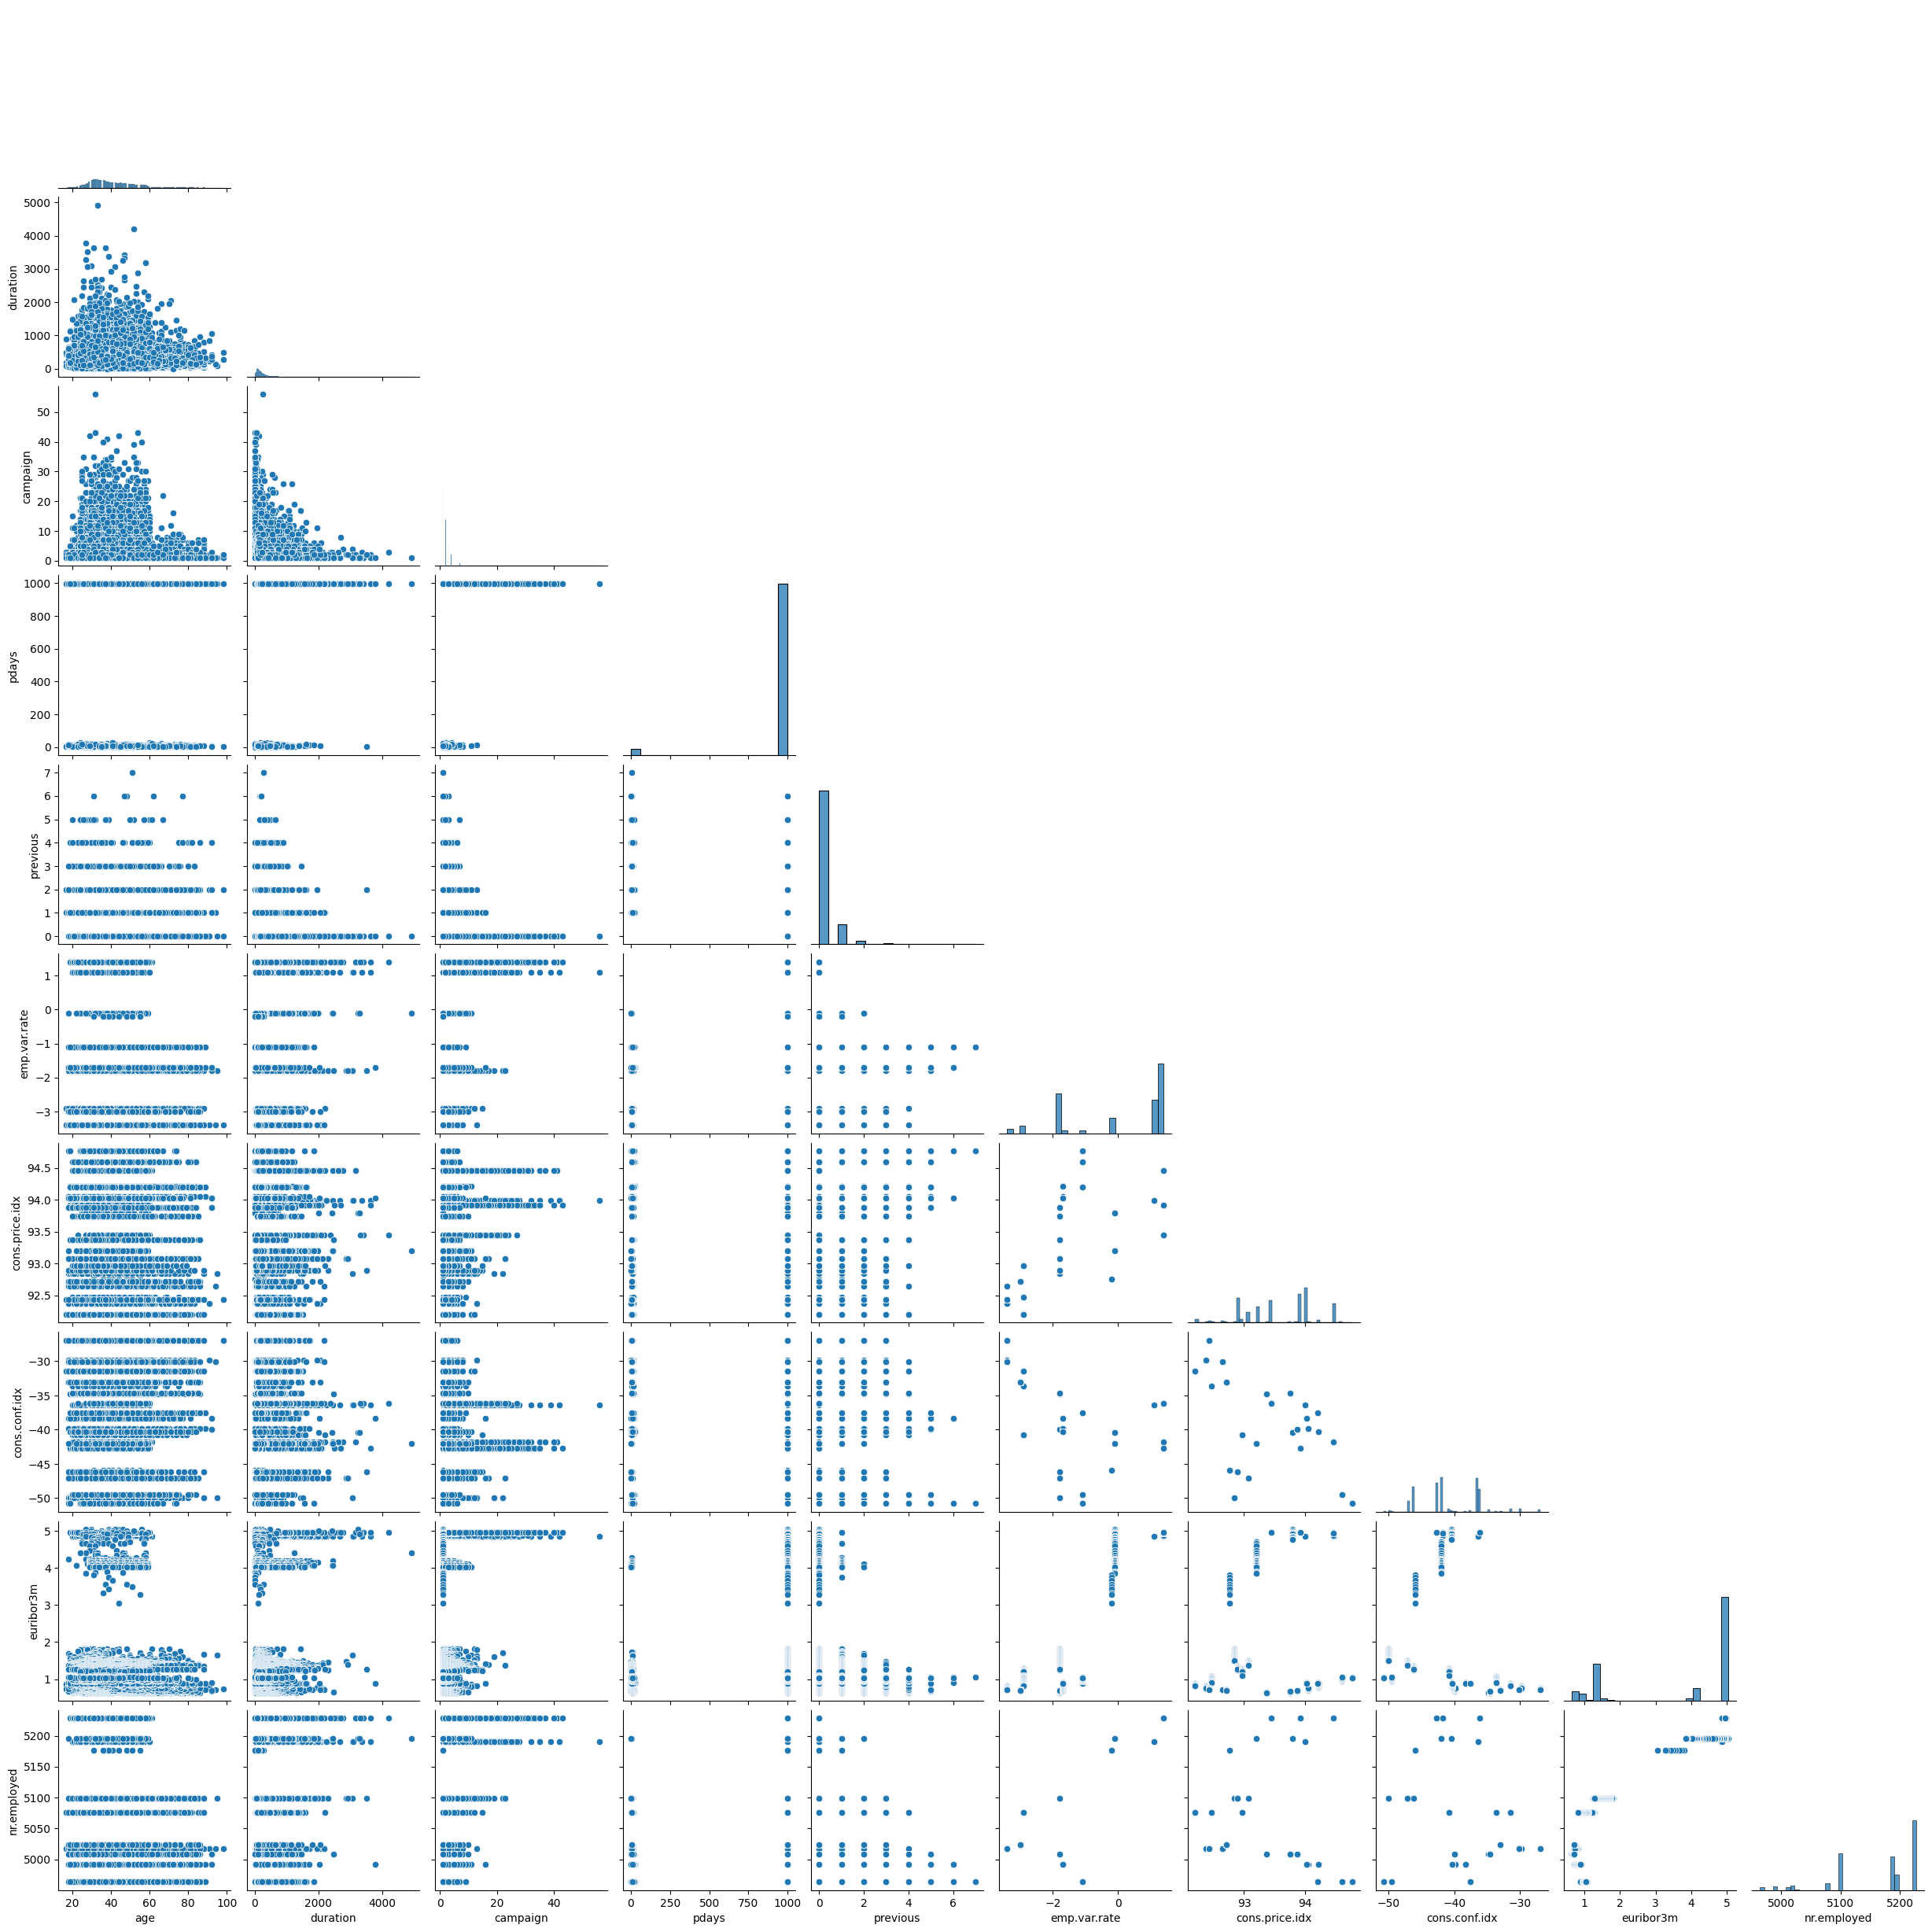

In [44]:
sns.pairplot(data, corner=True)

K-Means is based on numerical values, which is why dummy variables are required. Furthermore the order of magnitude of the various numerical features differs significantly, which is why it can be useful to scale each feature. 

In [46]:
X = pd.get_dummies(data)
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False


In [48]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

In [67]:
model = KMeans(
    n_clusters=2,    # Number of clusters K
    n_init='auto',   # Number of models that are tried with different start centroid seeds
    random_state=42,
)

In [71]:
cluster_labels = model.fit_predict(Xs)
cluster_labels

array([0, 0, 0, ..., 1, 1, 1])

In [73]:
X['Cluster'] = cluster_labels
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,0


When looking at the correlation values, the dummy variables will have equal but opposite correlation values, which makes sense because they are derived from the same original variable. 

In [80]:
correlation_factors = X.corr()['Cluster'].iloc[:-1]
correlation_factors

age                    -0.019767
duration                0.039581
campaign               -0.129103
pdays                  -0.267714
previous                0.478493
                          ...   
poutcome_failure        0.464320
poutcome_nonexistent   -0.544406
poutcome_success        0.254406
subscribed_no          -0.294472
subscribed_yes          0.294472
Name: Cluster, Length: 65, dtype: float64

The features most strongly correlated with the assigned clusters can be computed. The next step would be to discuss the features with the strongest correlation with a domain expert to continue the analysis. 

<Axes: >

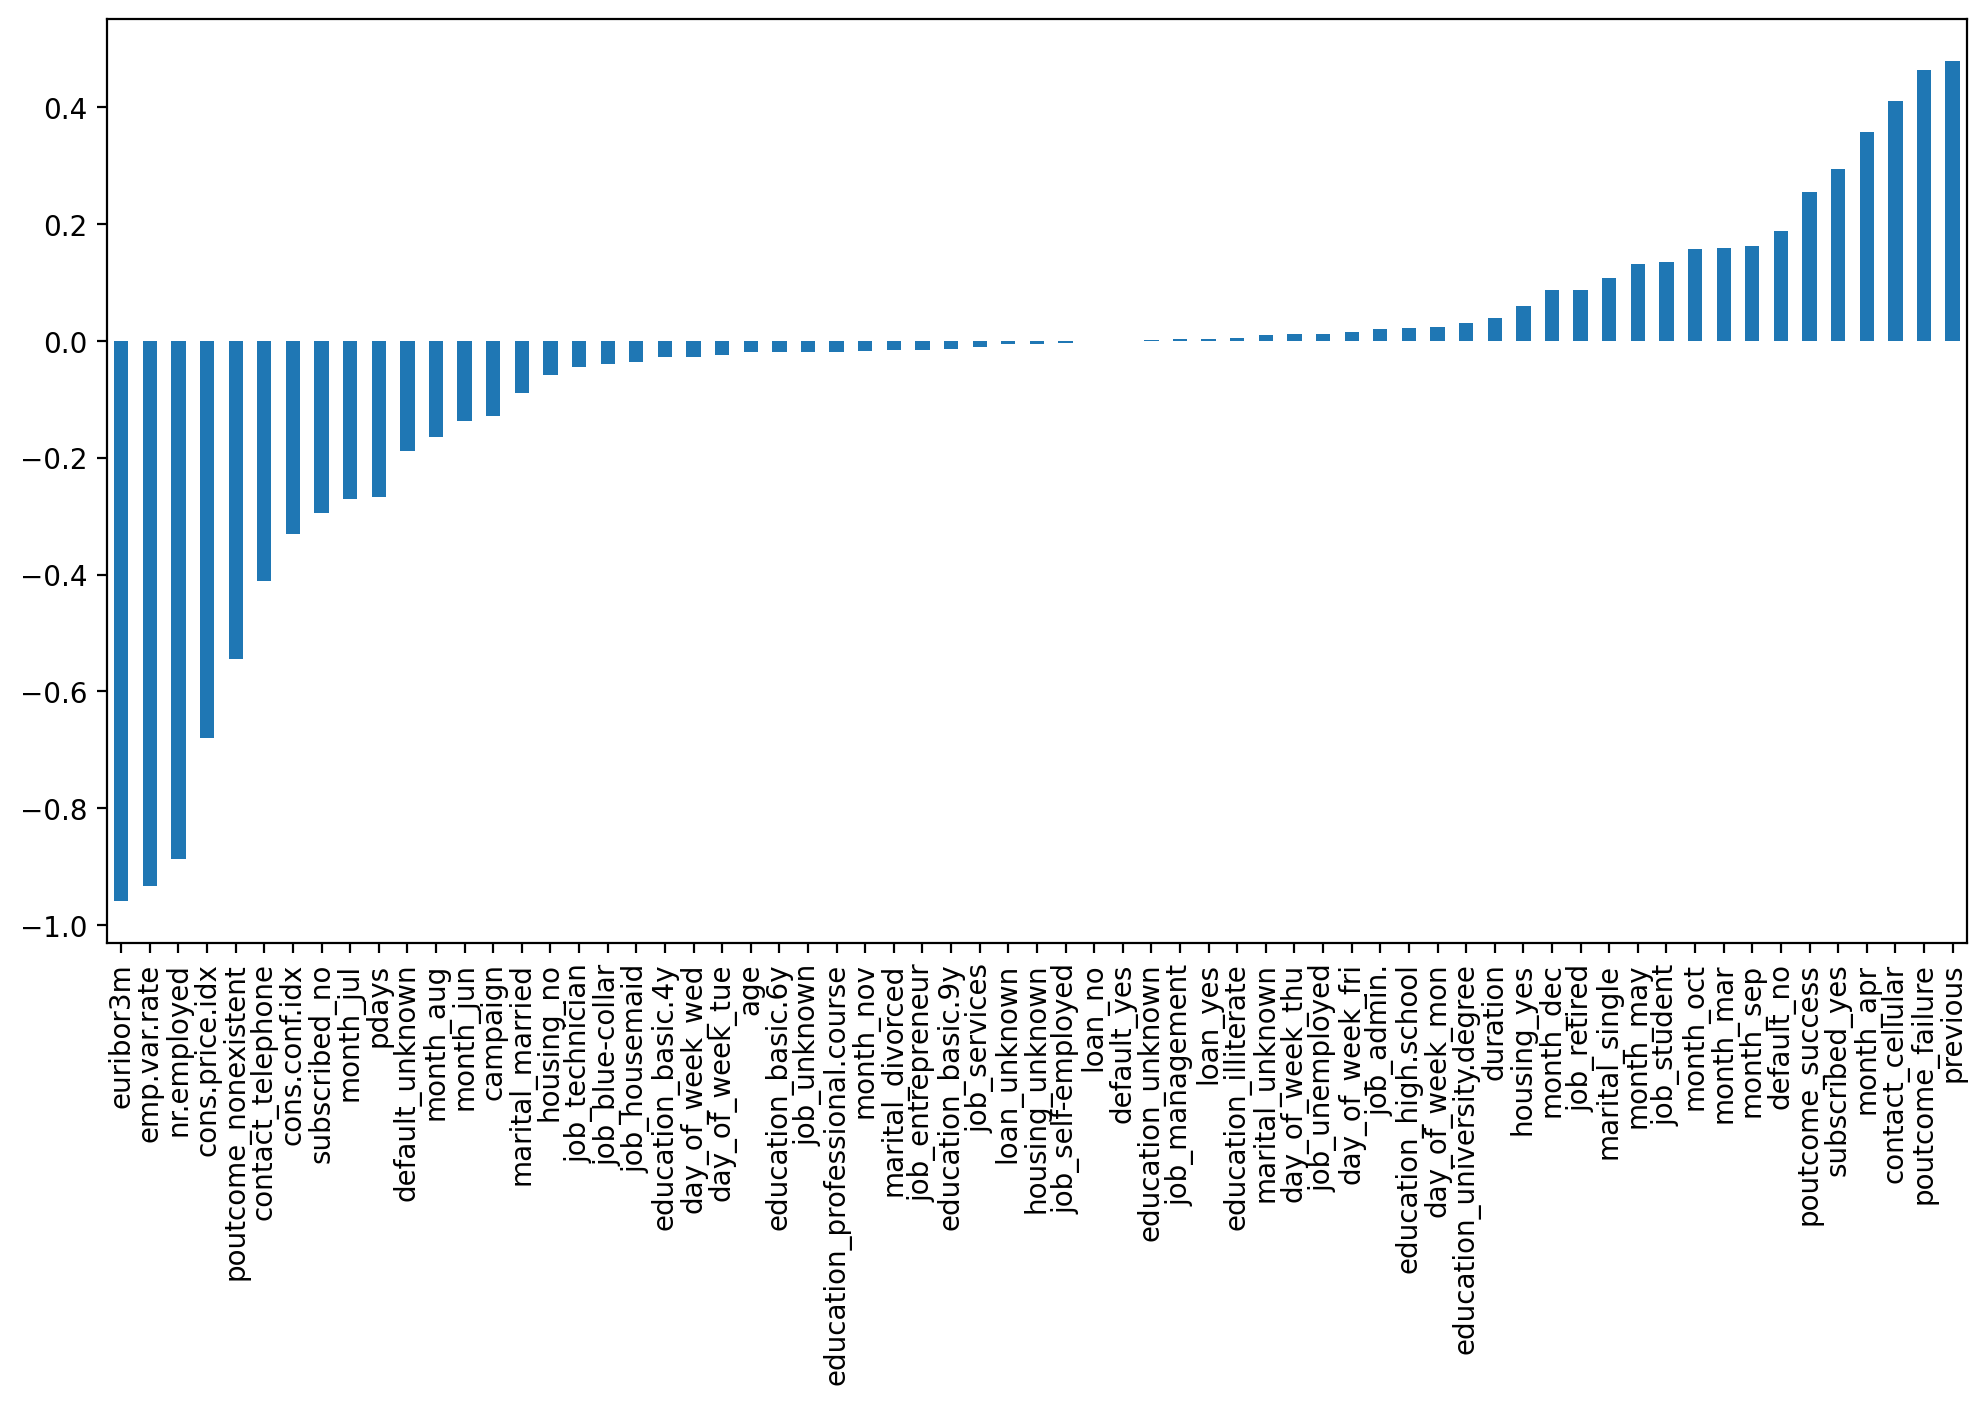

In [85]:
plt.figure(dpi=200, figsize=(12, 6))

correlation_factors.sort_values(ascending=True).plot(kind='bar')

The plot above simply tells you which features are most important to the clustering algorithm, not what the optimal number of clusters is. For this the SSD approach can be used

In [87]:
ssd = []
for k in range(2, 40):
    model = KMeans(n_clusters=k, n_init='auto')
    model.fit(Xs)
    
    ssd.append(model.inertia_)

Based on the graph we could choose different values of $K$ some good choices might be
* 8
* 18
* 26

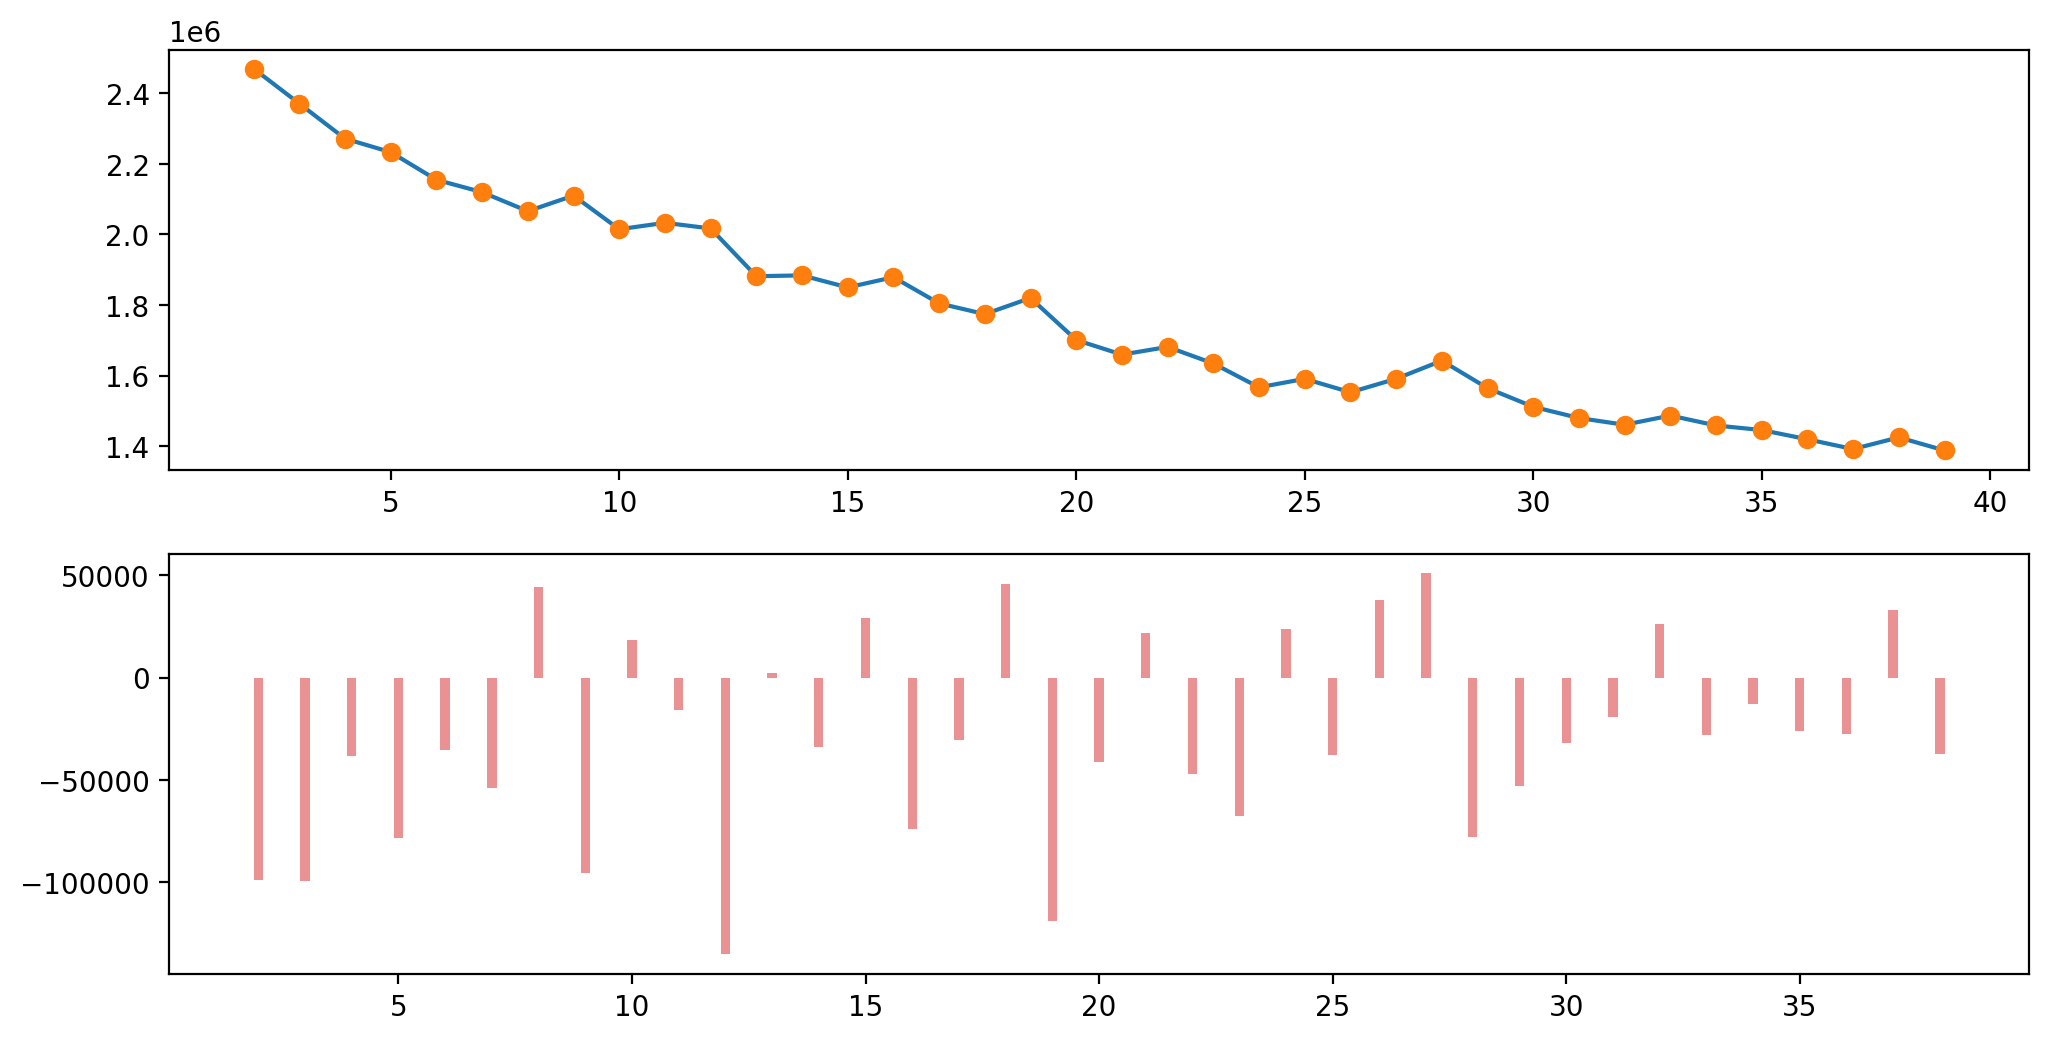

In [105]:
fig, ax = plt.subplots(2, 1, dpi=200, figsize=(12, 6))
ax1, ax2 = ax

ax1.plot(range(2, 40), ssd, '-')
ax1.plot(range(2, 40), ssd, 'o')

ssd_diff = list(pd.Series(ssd).diff())
ax2.bar(range(2, 40-1),ssd_diff[1:], width=0.2, color='tab:red', alpha=0.5)

plt.show()
